One of the main areas of research in machine learning is the analysis of water quality. It is also known as water potability analysis because our task here is to understand all the factors that affect water potability and train a machine learning model that can classify whether a specific water sample is safe or unfit for consumption.

For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption.

## Importing the necessary Python libraries & the dataset:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

I can see null values in the first preview of this dataset itself, so before we go ahead, let’s remove all the rows that contain null values:

In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [7]:
data.describe().T

count          mean          std         min           25%  \
ph               2011.0      7.085990     1.573337    0.227499      6.089723   
Hardness         2011.0    195.968072    32.635085   73.492234    176.744938   
Solids           2011.0  21917.441374  8642.239815  320.942611  15615.665390   
Chloramines      2011.0      7.134338     1.584820    1.390871      6.138895   
Sulfate          2011.0    333.224672    41.205172  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712572  201.619737    366.680307   
Organic_carbon   2011.0     14.357709     3.324959    2.200000     12.124105   
Trihalomethanes  2011.0     66.400859    16.077109    8.577013     55.952664   
Turbidity        2011.0      3.969729     0.780346    1.450000      3.442915   
Potability       2011.0      0.403282     0.490678    0.000000      0.000000   

                          50%           75%           max  
ph                   7.027297      8.052969     14.000000  
Hardness           197.191839    216.441070    317.338124  
Solids           20933.512750  27182.587067  56488.672413  
Chloramines          7.143907      8.109726     13.127000  
Sulfate            332.232177    359.330555    481.030642  
Conductivity       423.455906    482.373169    753.342620  
Organic_carbon      14.322019     16.683049     27.006707  
Trihalomethanes     66.542198     77.291925    124.000000  
Turbidity            3.968177      4.514175      6.494749  
Potability           0.000000      1.000000      1.000000

In [8]:
# skewness along the index axis
data.skew(axis=0, skipna=True)

ph                 0.048947
Hardness          -0.085237
Solids             0.595894
Chloramines        0.012976
Sulfate           -0.046558
Conductivity       0.266869
Organic_carbon    -0.020018
Trihalomethanes   -0.051422
Turbidity         -0.033051
Potability         0.394614
dtype: float64

## Data Visualization:

### pair plot:

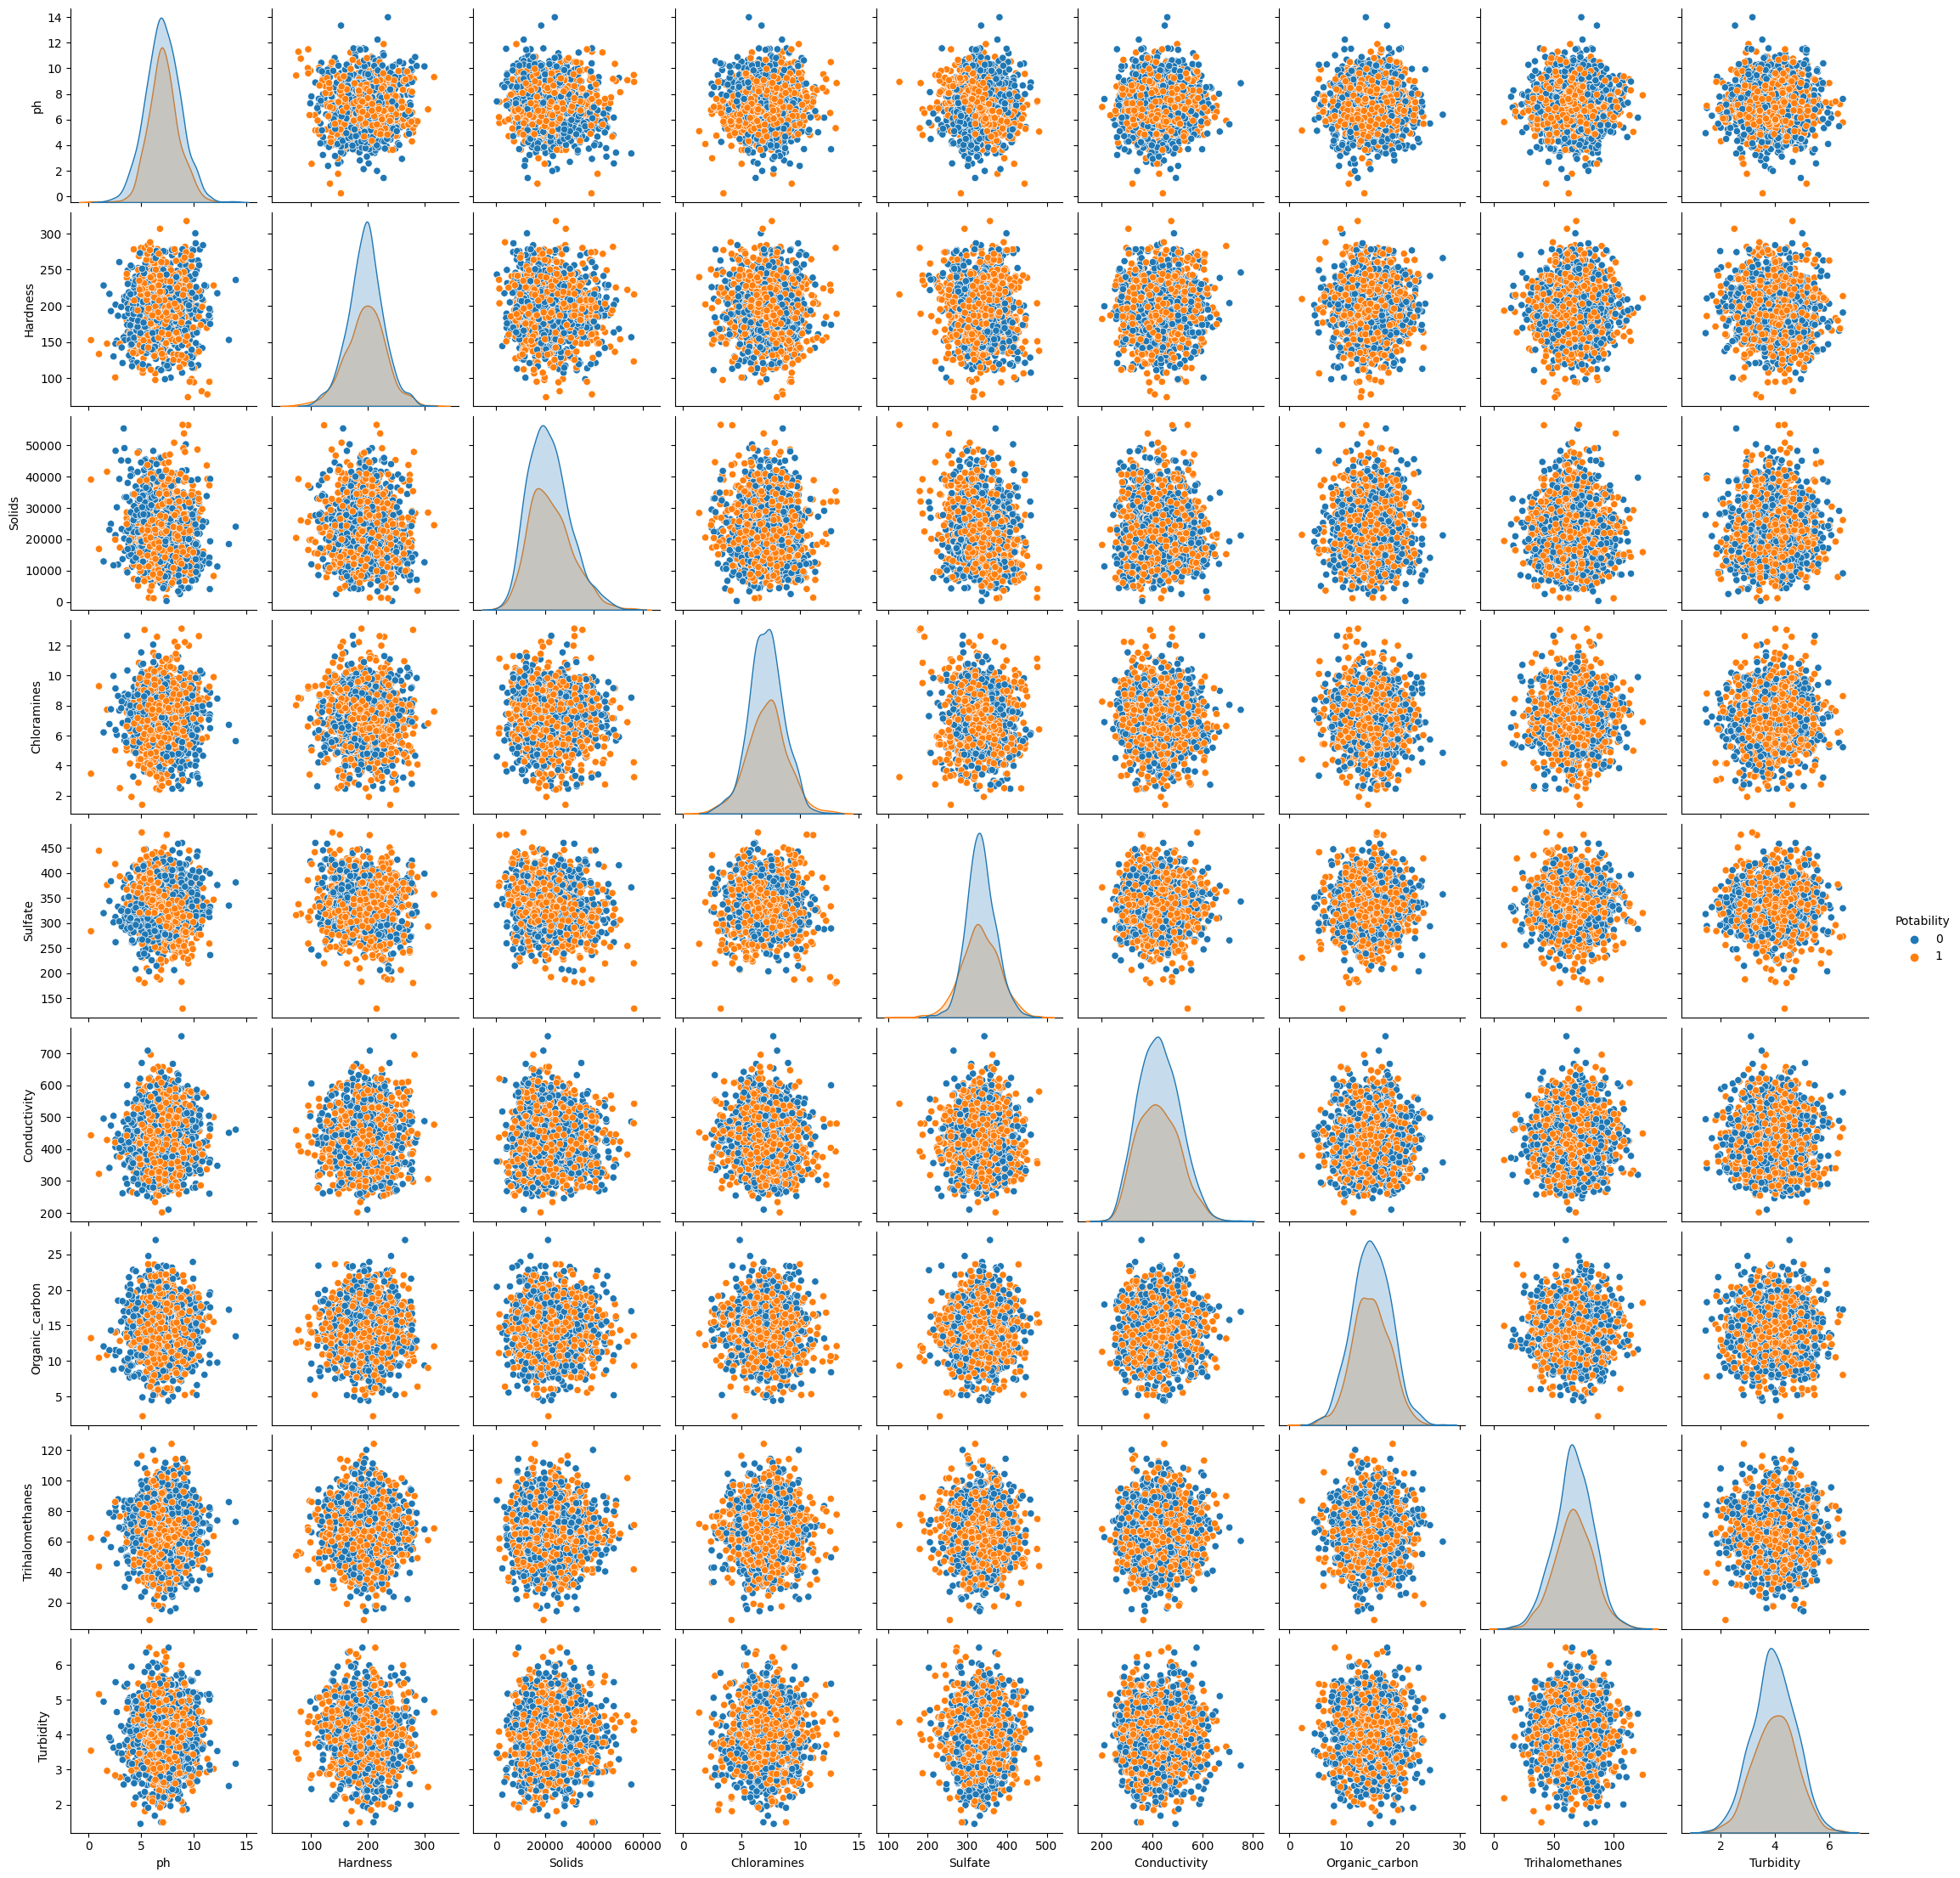

In [9]:
sns.pairplot(data = data, hue = 'Potability')

### scatter plot:

array([[<Axes: xlabel='ph', ylabel='ph'>,
        <Axes: xlabel='Hardness', ylabel='ph'>,
        <Axes: xlabel='Solids', ylabel='ph'>,
        <Axes: xlabel='Chloramines', ylabel='ph'>,
        <Axes: xlabel='Sulfate', ylabel='ph'>,
        <Axes: xlabel='Conductivity', ylabel='ph'>,
        <Axes: xlabel='Organic_carbon', ylabel='ph'>,
        <Axes: xlabel='Trihalomethanes', ylabel='ph'>,
        <Axes: xlabel='Turbidity', ylabel='ph'>,
        <Axes: xlabel='Potability', ylabel='ph'>],
       [<Axes: xlabel='ph', ylabel='Hardness'>,
        <Axes: xlabel='Hardness', ylabel='Hardness'>,
        <Axes: xlabel='Solids', ylabel='Hardness'>,
        <Axes: xlabel='Chloramines', ylabel='Hardness'>,
        <Axes: xlabel='Sulfate', ylabel='Hardness'>,
        <Axes: xlabel='Conductivity', ylabel='Hardness'>,
        <Axes: xlabel='Organic_carbon', ylabel='Hardness'>,
        <Axes: xlabel='Trihalomethanes', ylabel='Hardness'>,
        <Axes: xlabel='Turbidity', ylabel='Hardness'>,
       

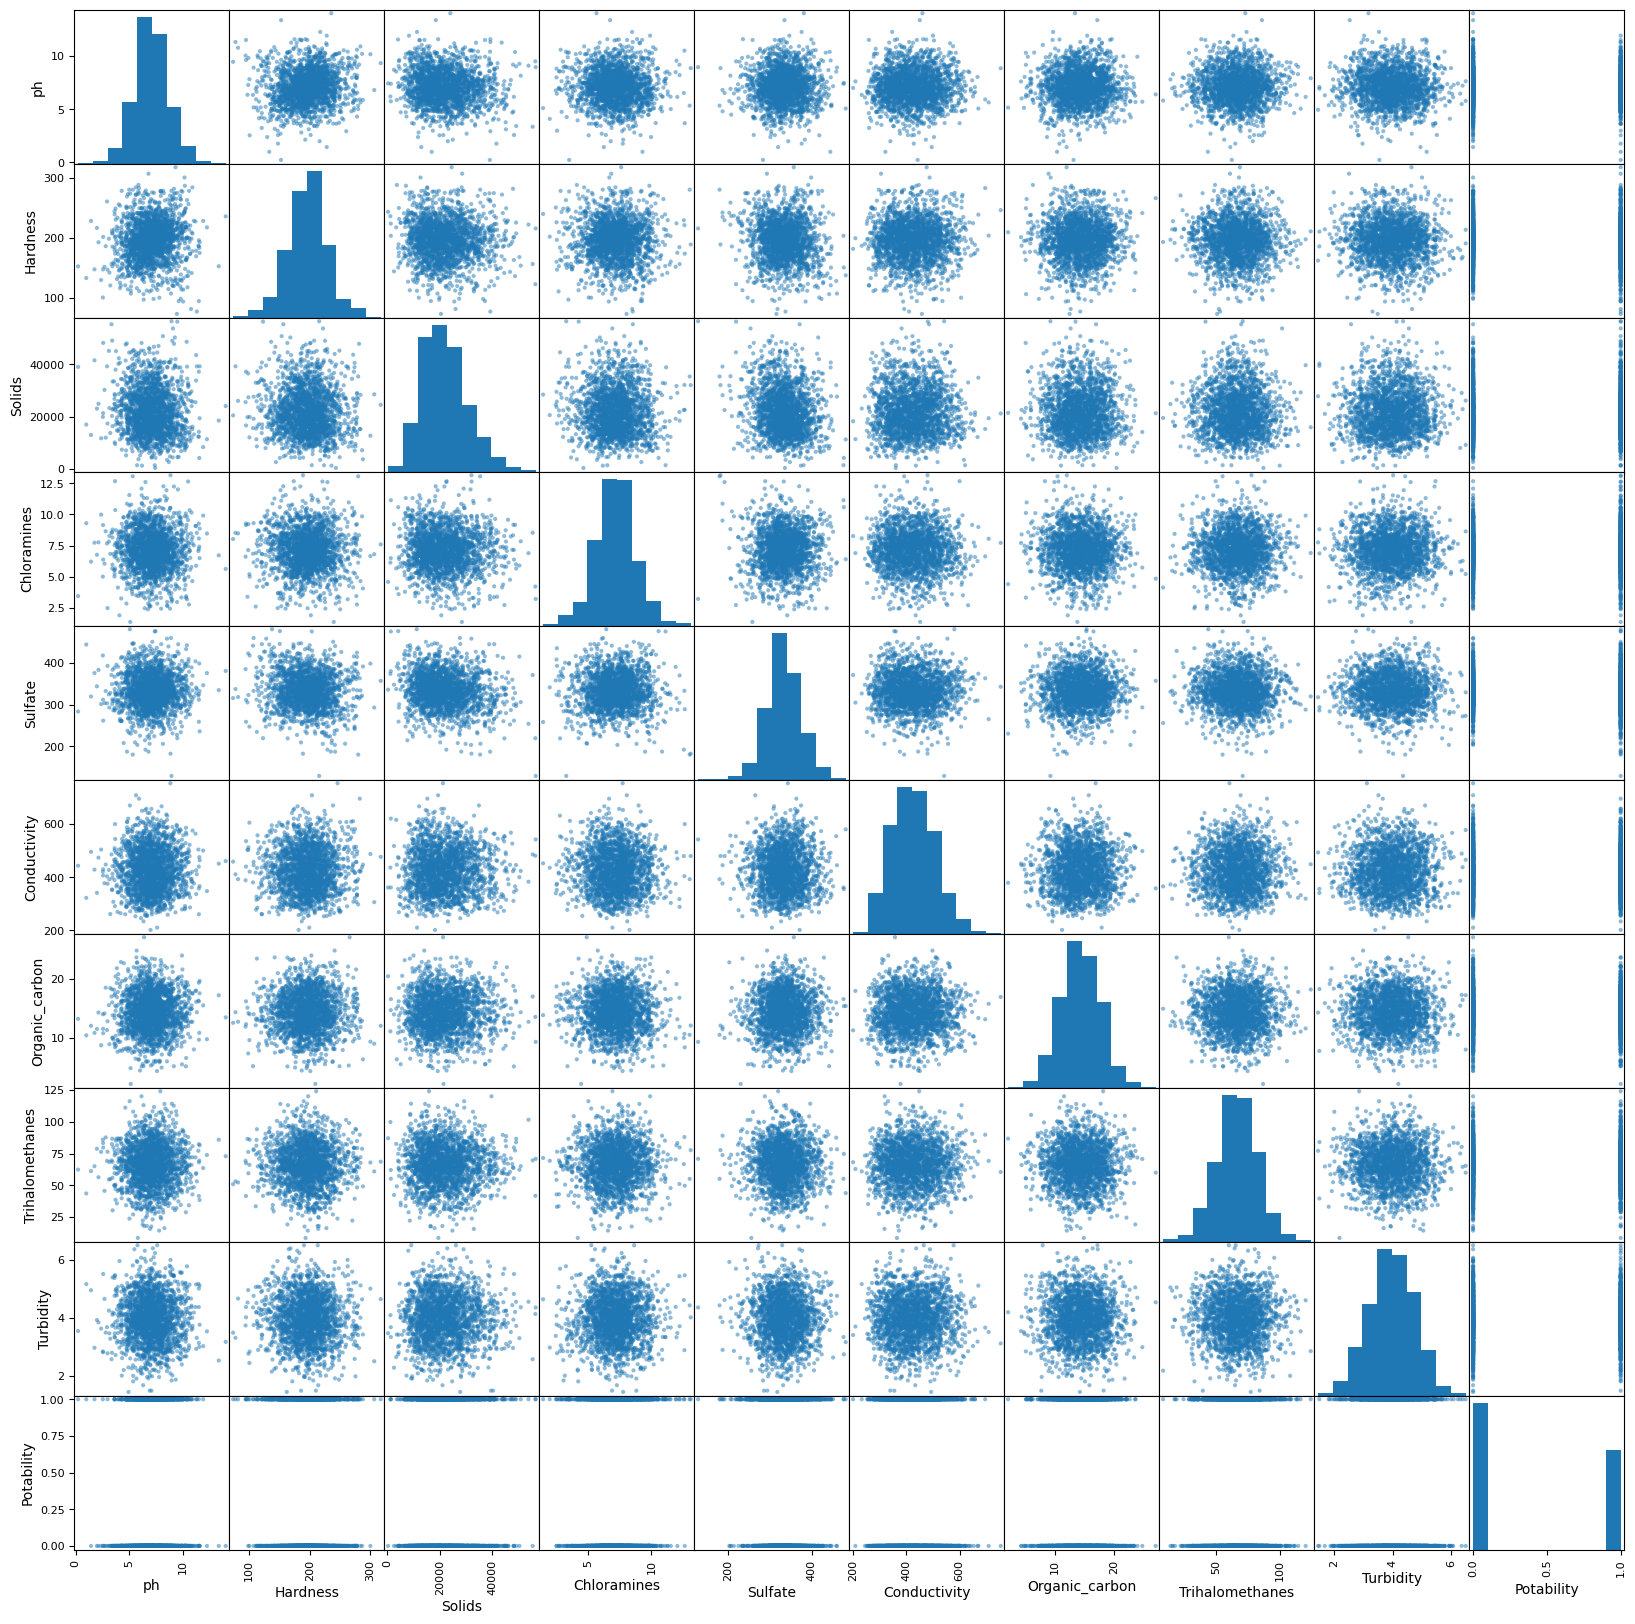

In [10]:
pd.plotting.scatter_matrix(data, figsize = (20, 20))

### Correlation:

In [11]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.108948 -0.087615    -0.024768  0.010524   
Hardness         0.108948  1.000000 -0.053269    -0.022685 -0.108521   
Solids          -0.087615 -0.053269  1.000000    -0.051789 -0.162769   
Chloramines     -0.024768 -0.022685 -0.051789     1.000000  0.006254   
Sulfate          0.010524 -0.108521 -0.162769     0.006254  1.000000   
Conductivity     0.014128  0.011731 -0.005198    -0.028277 -0.016192   
Organic_carbon   0.028375  0.013224 -0.005484    -0.023808  0.026776   
Trihalomethanes  0.018278 -0.015400 -0.015668     0.014990 -0.023347   
Turbidity       -0.035849 -0.034831  0.019409     0.013137 -0.009934   
Potability       0.014530 -0.001505  0.040674     0.020784 -0.015303   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.014128        0.028375         0.018278  -0.035849   
Hardness             0.011731        0.013224        -0.015400  -0.034831   
Solids              -0.005198       -0.005484        -0.015668   0.019409   
Chloramines         -0.028277       -0.023808         0.014990   0.013137   
Sulfate             -0.016192        0.026776        -0.023347  -0.009934   
Conductivity         1.000000        0.015647         0.004888   0.012495   
Organic_carbon       0.015647        1.000000        -0.005667  -0.015428   
Trihalomethanes      0.004888       -0.005667         1.000000  -0.020497   
Turbidity            0.012495       -0.015428        -0.020497   1.000000   
Potability          -0.015496       -0.015567         0.009244   0.022682   

                 Potability  
ph                 0.014530  
Hardness          -0.001505  
Solids             0.040674  
Chloramines        0.020784  
Sulfate           -0.015303  
Conductivity      -0.015496  
Organic_carbon    -0.015567  
Trihalomethanes    0.009244  
Turbidity          0.022682  
Potability         1.000000

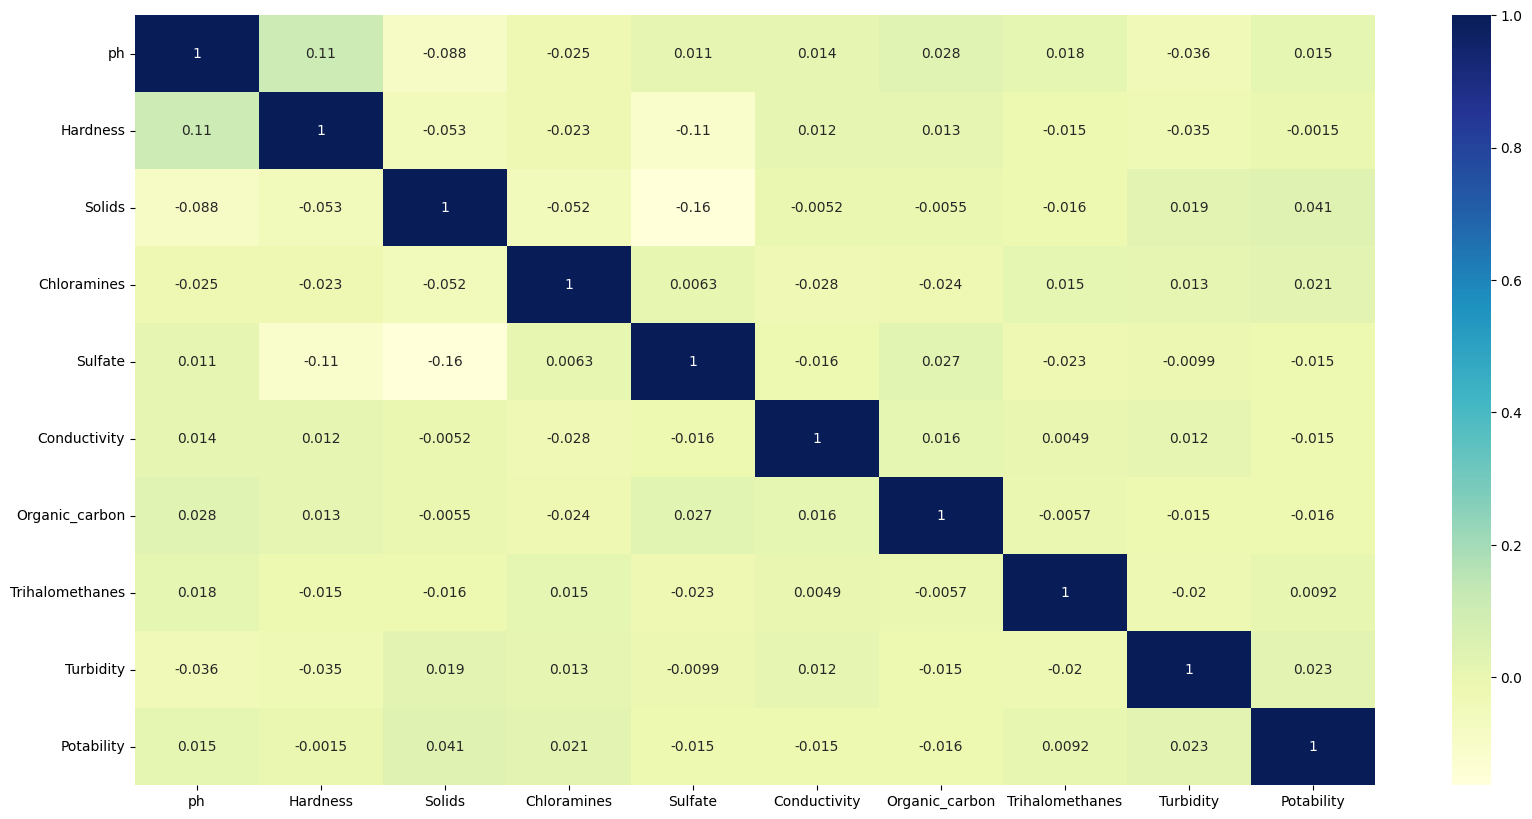

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

The Potability column of this dataset is the column, we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. So let’s see the distribution of 0 and 1 in the Potability column:

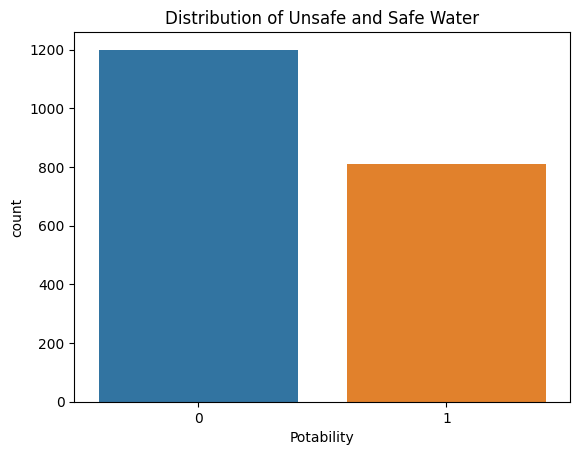

In [13]:
sns.countplot(x = 'Potability', data = data)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

So, this is something you should note that this dataset is not balanced because samples of 0's are more than 1's.

As mentioned above, there are no factors that we cannot ignore that affect water quality, so let’s explore all the columns one by one. Let’s start by looking at the ph column:

In [14]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", color = "Potability", title= "Factors Affecting Water Quality: PH")
figure.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. Now let’s look at the second factor affecting water quality in the dataset:

In [15]:
figure = px.histogram(data, x = "Hardness", color = "Potability", title= "Factors Affecting Water Quality: Hardness")
figure.show()

The figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. Now let’s take a look at the next factor affecting water quality:

In [16]:
figure = px.histogram(data, x = "Solids", color = "Potability", title= "Factors Affecting Water Quality: Solids")
figure.show()

The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now let’s take a look at the next factor affecting water quality:

In [17]:
figure = px.histogram(data, x = "Chloramines", color = "Potability", title= "Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems. Now let’s take a look at the next factor affecting water quality:

In [18]:
figure = px.histogram(data, x = "Sulfate", color = "Potability", title= "Factors Affecting Water Quality: Sulfate")
figure.show()

The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink. Now let’s see the next factor:

In [19]:
figure = px.histogram(data, x = "Conductivity", color = "Potability", title= "Factors Affecting Water Quality: Conductivity")
figure.show()

The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable. Now let’s see the next factor:

In [20]:
figure = px.histogram(data, x = "Organic_carbon", color = "Potability", title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

The figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink. Now let’s take a look at the next factor that affects the quality of drinking water:

In [21]:
figure = px.histogram(data, x = "Trihalomethanes", color = "Potability", title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

The figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. Now let’s take a look at the next factor in the dataset that affects drinking water quality:

In [22]:
figure = px.histogram(data, x = "Turbidity", color = "Potability", title= "Factors Affecting Water Quality: Turbidity")
figure.show()

The figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

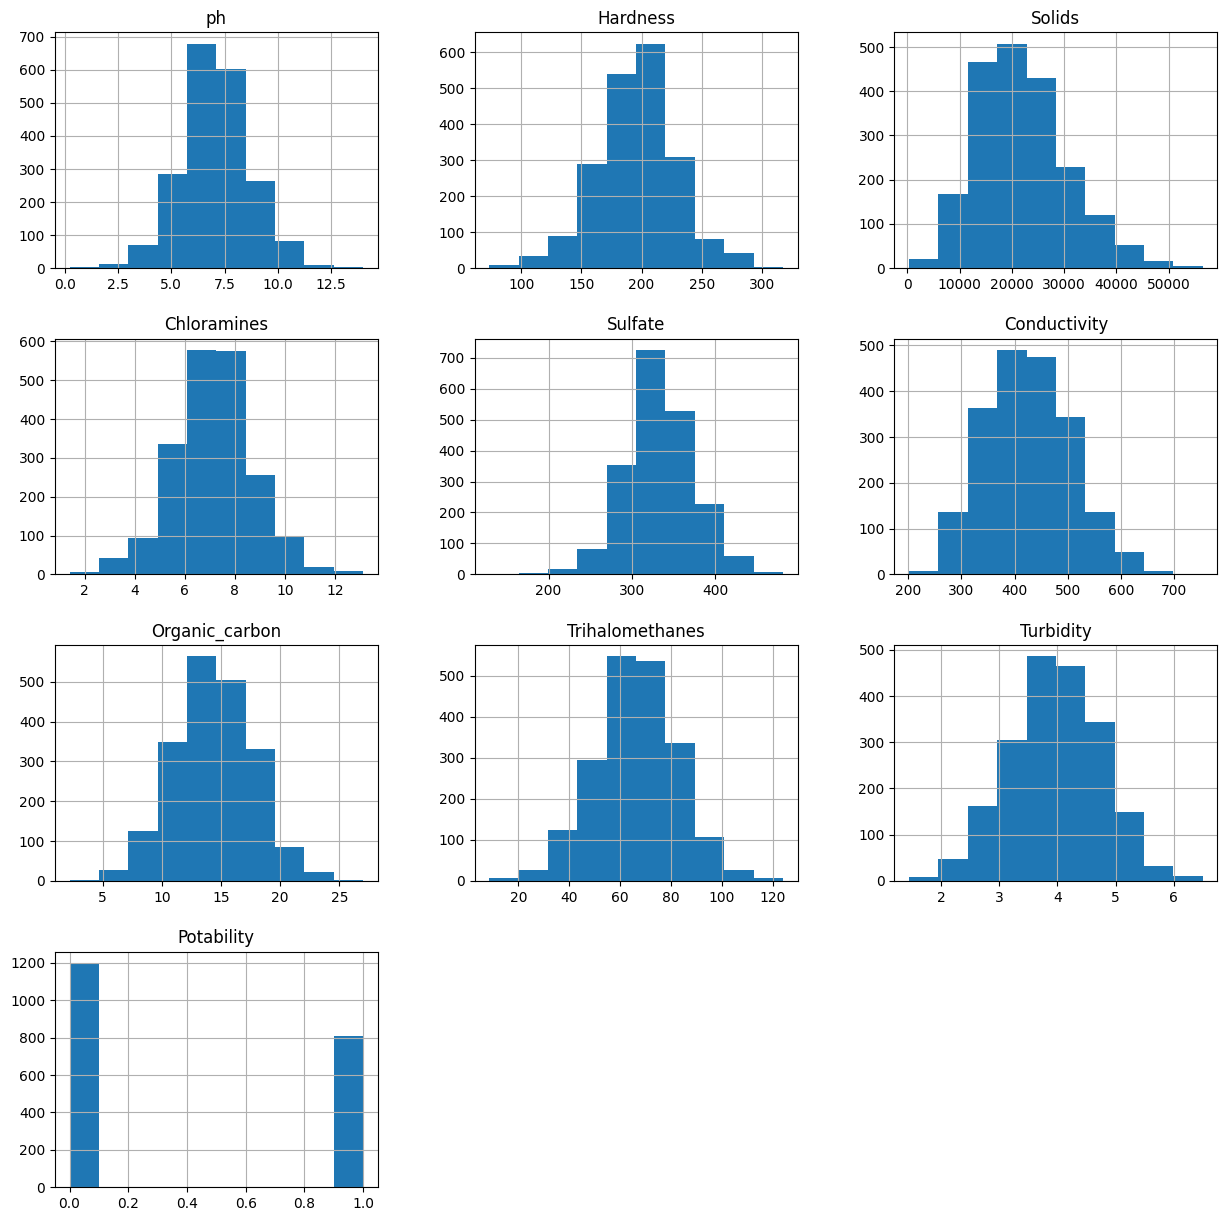

In [23]:
data.hist(figsize=(15,15))
plt.show()

# Let's check the Outlier using Box Plot

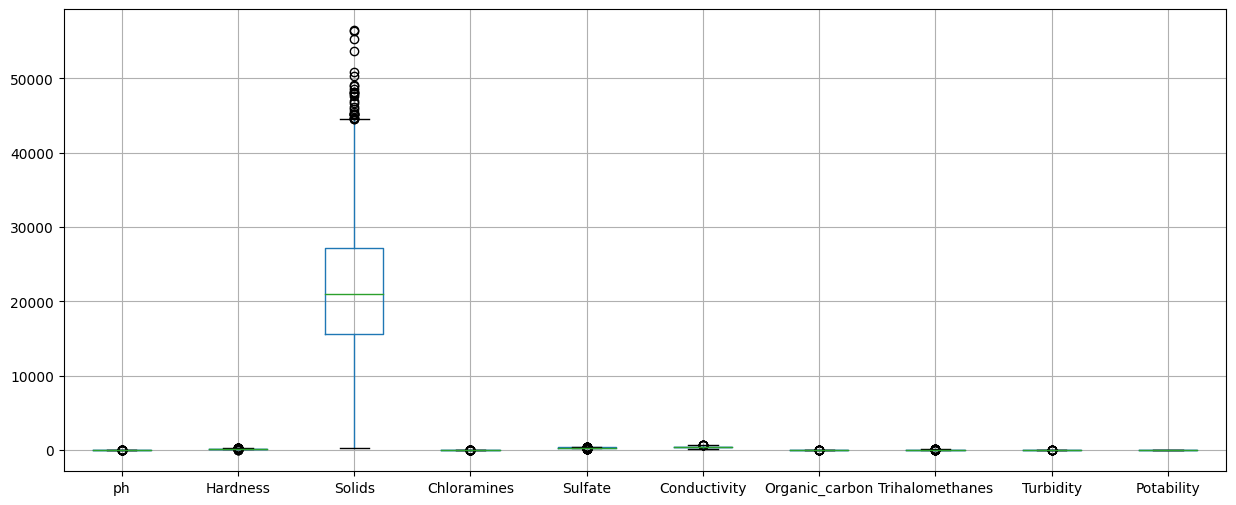

In [24]:
data.boxplot(figsize=(15,6))
plt.show()

In [25]:
data['Solids'].describe()

count     2011.000000
mean     21917.441374
std       8642.239815
min        320.942611
25%      15615.665390
50%      20933.512750
75%      27182.587067
max      56488.672413
Name: Solids, dtype: float64

Not removing the Outlier coz they may be important to decide the quality of water.

# **Water Quality Prediction Model using Python**

In the above section, we explored all the features that affect water quality. Now, the next step is to train a machine learning model for the task of water quality analysis using Python. For this task, I will be going to split dataset into 80:20 ratio.

Before training a machine learning model, let’s have a look at the correlation of all the features with respect to the Potability column in the dataset:

In [26]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

# Split the dataset:

In [27]:
#independent and dependent features
x = data.iloc[:,:-1] #leaving last column
y = data.iloc[:,-1]

In [28]:
x

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
5       280.467916        8.399735        54.917862   2.559708  
6       283.651634       13.789695        84.603556   2.672989  
7       474.607645       12.363817        62.798309   4.401425  
...            ...             ...              ...        ...  
3267    390.410231        9.899115        55.069304   4.613843  
3268    329.266002       16.217303        28.878601   3.442983  
3269    439.893618       16.172755        41.558501   4.369264  
3270    415.886955       12.067620        60.419921   3.669712  
3271    526.424171       13.894419        66.687695   4.435821  

[2011 rows x 9 columns]

In [29]:
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [30]:
#Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, shuffle=True, random_state=0)

In [31]:
x_train

ph    Hardness        Solids  Chloramines     Sulfate  \
1594   8.733525  203.396130  24578.421221     6.594145  288.678463   
845    6.592443  242.480473   9381.239931     7.303184  312.814395   
3211   6.817608  219.337429  27548.614177     6.298121  340.937614   
572    8.805178  157.231982   4728.650671     8.848262  356.773638   
2965   9.459931  222.894659  14450.175747     6.790914  293.746321   
...         ...         ...           ...          ...         ...   
1354   6.453065  178.998245  23129.460178     6.354508  326.853185   
1979   7.201702  147.711086  37308.994159     5.677451  279.164446   
2700   7.117579  186.199680  31528.948690     6.387037  335.348881   
908   10.282068  198.546363   8108.297322     5.548407  332.017935   
1099   7.269652  155.157520  31161.368388     3.181183  244.795198   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1594    336.824656       16.701920        68.793062   3.149202  
845     440.601135       14.027297        70.929879   3.060827  
3211    530.710026       19.486791        68.568791   3.048292  
572     299.279775        9.439925        61.640597   5.176205  
2965    433.145005        9.069161        67.906813   3.322890  
...            ...             ...              ...        ...  
1354    371.882763       13.178301        41.525863   3.440859  
1979    395.976824       13.326125        63.626894   3.883250  
2700    380.578265       19.073996        75.903072   4.333402  
908     568.078980       15.661692        28.770619   4.572923  
1099    506.010135       17.385515        73.115053   3.789237  

[1608 rows x 9 columns]

In [32]:
y_train

1594    1
845     0
3211    1
572     0
2965    0
       ..
1354    0
1979    1
2700    0
908     0
1099    1
Name: Potability, Length: 1608, dtype: int64

In [33]:
x_test

ph    Hardness        Solids  Chloramines     Sulfate  \
367   6.505873  240.287912  29534.690292     6.775277  341.728239   
1985  6.266800  187.829617  27577.213623     9.141597  322.917848   
2962  8.527142  217.394778   3413.081633     5.670027  337.631073   
710   5.251354  167.924336  34768.933420     4.023081  377.143489   
1344  5.664846  186.648359  18678.950811     5.153873  313.083489   
...        ...         ...           ...          ...         ...   
1286  6.619775  150.718361  11388.534187     6.807580  370.753469   
2006  6.538207  214.992866  12330.406568     7.300092  389.817036   
466   7.539882  185.825975  21575.245221     7.442999  333.079630   
94    6.953372  203.146547  11609.109055     5.495738  304.283193   
2628  4.811832  150.451280  27547.807056     7.569544  296.002194   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
367     265.251199       13.570223        93.166465   4.497529  
1985    277.050802       13.290252        59.454325   3.652845  
2962    615.611167       14.926751        82.590152   2.649424  
710     315.536105       10.429159        70.593387   4.072252  
1344    335.505521       17.551570        59.571837   3.570290  
...            ...             ...              ...        ...  
1286    431.430087        7.710769        73.634278   4.086921  
2006    465.352665       22.089402        24.532773   3.426266  
466     444.116633       15.830565        49.067977   4.531594  
94      551.143337        9.387781        55.958006   3.651866  
2628    521.561561       16.295837        44.288552   2.860993  

[403 rows x 9 columns]

In [34]:
y_test

367     1
1985    1
2962    0
710     1
1344    0
       ..
1286    0
2006    1
466     0
94      0
2628    0
Name: Potability, Length: 403, dtype: int64

# **MODELS:**

In [35]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [36]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state=0 ,probability=True)
svc.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [37]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [38]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state=0)
ranfor.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [40]:
# Making predictions on test dataset
y_pred_logreg = logreg.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_dectree = dectree.predict(x_test)
y_pred_ranfor = ranfor.predict(x_test)

In [41]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
model_scores = {'LR': accuracy_score(y_test, y_pred_logreg)*100,
'SVM': accuracy_score(y_test, y_pred_svc)*100,
'NB': accuracy_score(y_test, y_pred_nb)*100,
'DT': accuracy_score(y_test, y_pred_dectree)*100,
'RF': accuracy_score(y_test, y_pred_ranfor)*100}

# Model Comparison

In [42]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
model_compare

LR        SVM         NB         DT         RF
Accuracy  63.275434  61.538462  65.508685  62.282878  67.741935

In [43]:
# Evaluating using classification report
from sklearn.metrics import classification_report
print('LR:', classification_report(y_test, y_pred_logreg),'\n'
      'SVM:', classification_report(y_test, y_pred_svc),'\n'
      'NB:', classification_report(y_test, y_pred_nb),'\n',
      'DT:', classification_report(y_test, y_pred_dectree),'\n',
      'RF:', classification_report(y_test, y_pred_ranfor))

LR:               precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       1.00      0.02      0.04       151

    accuracy                           0.63       403
   macro avg       0.81      0.51      0.41       403
weighted avg       0.77      0.63      0.50       403
 
SVM:               precision    recall  f1-score   support

           0       0.62      0.97      0.76       252
           1       0.30      0.02      0.04       151

    accuracy                           0.62       403
   macro avg       0.46      0.50      0.40       403
weighted avg       0.50      0.62      0.49       403
 
NB:               precision    recall  f1-score   support

           0       0.67      0.89      0.76       252
           1       0.59      0.26      0.36       151

    accuracy                           0.66       403
   macro avg       0.63      0.58      0.56       403
weighted avg       0.64      0.66      0.61       403
 
 DT

<Axes: >

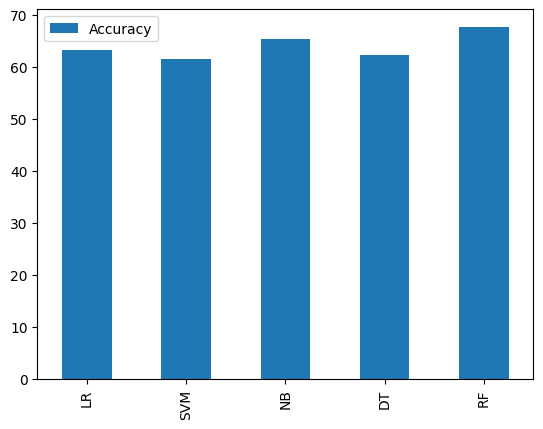

In [44]:
model_compare.T.plot(kind='bar') #(T is here for transpose)

The above results are looking satisfactory.

So this is how you can analyze the quality of water and train a machine learning model to classify safe and unsafe water for drinking. Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63a23088-2600-4d68-b4c0-aa7797be8316' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>